In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# cd /content/drive/MyDrive/OML---mini-project/src
%cd /content/drive/MyDrive/cours/MA/MA4 (3)/OptML/project/OML---mini-project-main/src

/content/drive/MyDrive/cours/MA/MA4 (3)/OptML/project/OML---mini-project-main/src


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 36.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using ca

In [2]:
# This cell makes sure modules are auto-loaded when you change external python files
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

metric_folder = 'metrics'

## CIFAR 10 analysis

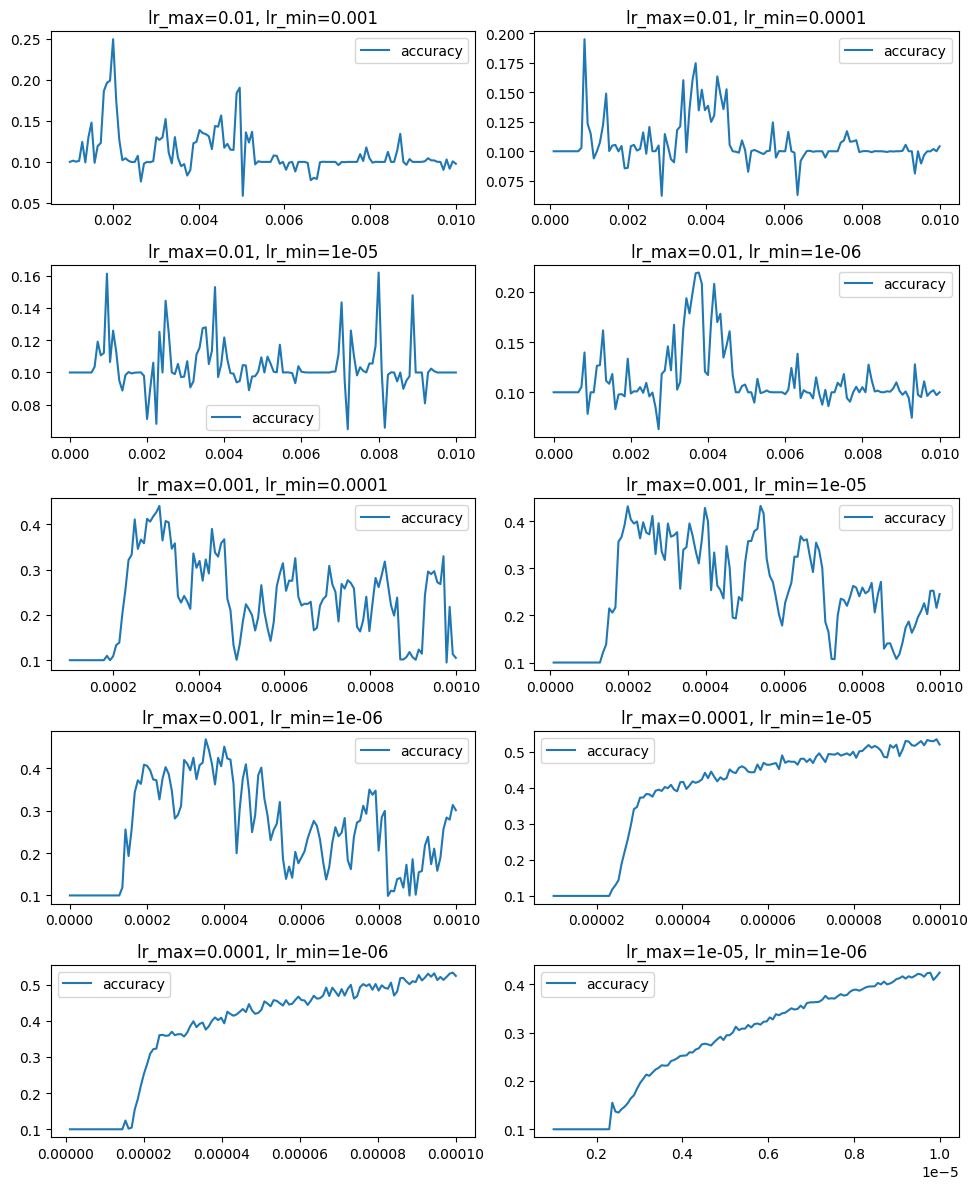

In [ ]:
file_names = [x for x in os.listdir('./metrics') if 'pretrained' in x and len(x.split('_')) == 5 and 'CIFAR10' in x]

assert len(file_names) == 10

metrics_dfs = []

fig, axs = plt.subplots(5, 2, figsize=(10, 12))
axs = axs.flatten()


for i, file_name in enumerate(file_names):

  df = pd.read_csv(os.path.join(metric_folder, file_names[i]))

  max_lr = float(file_names[i].split('_')[-2])
  min_lr = float(file_names[i].split('_')[-1][:-4])
  dataset_name = file_names[i].split('_')[0]

  ax = axs[i]
  #ax.plot(x, y, label=f'Subplot {i+1}')

  #todo plot accuracy learning rate

  df_filter = df[df['source'] == 'test']
  x = df_filter['lr'].to_numpy()
  y1 = df_filter['accuracy'].to_numpy()

  ax.plot(x, y1, label = "accuracy")

  ax.set_title(f'lr_max={max_lr}, lr_min={min_lr}')
  ax.legend()

plt.tight_layout()
plt.show()


## FashionMNIST analysis

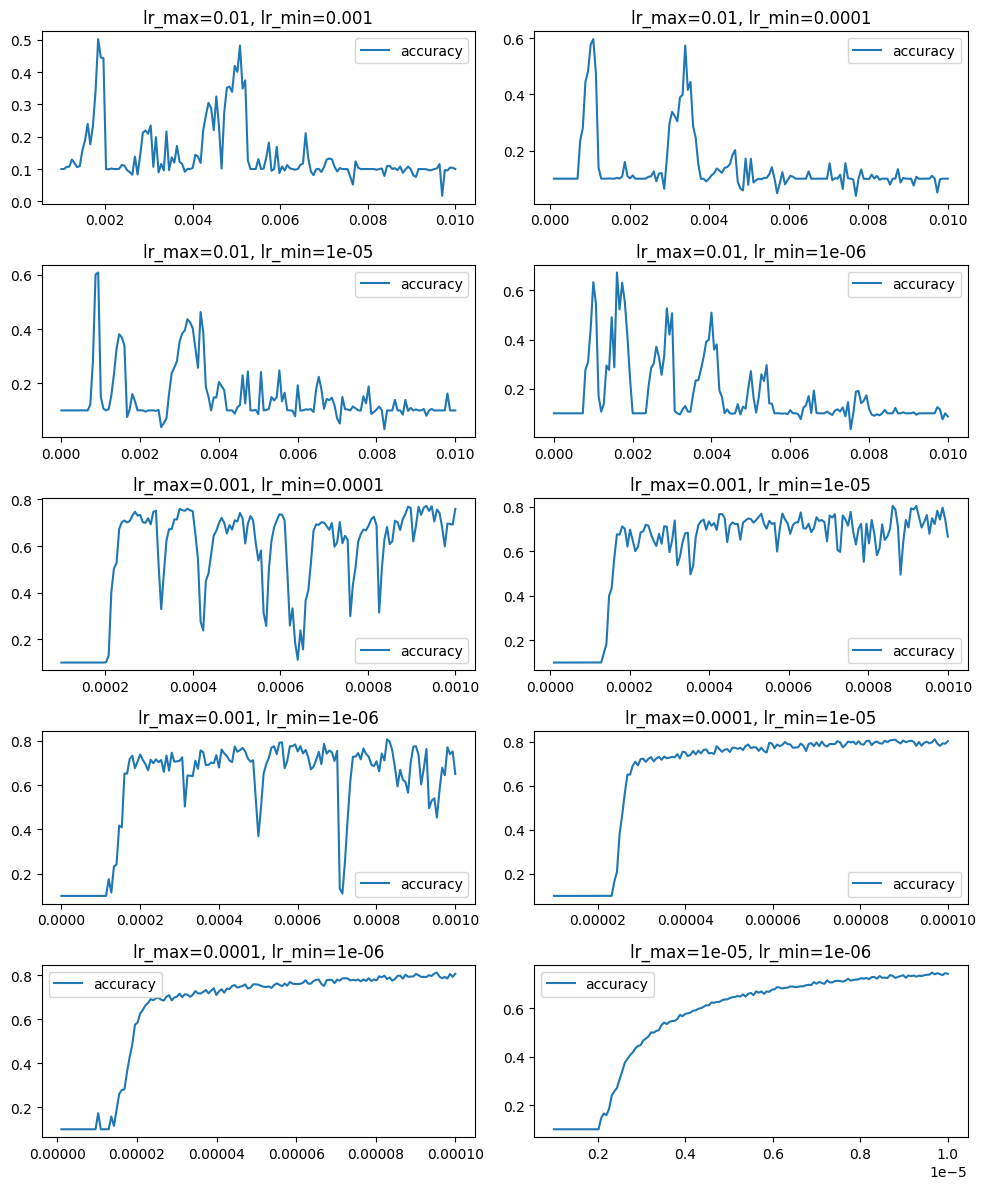

In [ ]:
file_names = [x for x in os.listdir('./metrics') if 'pretrained' in x and len(x.split('_')) == 5 and 'FashionMNIST' in x]

assert len(file_names) == 10

metrics_dfs = []

fig, axs = plt.subplots(5, 2, figsize=(10, 12))
axs = axs.flatten()


for i, file_name in enumerate(file_names):

  df = pd.read_csv(os.path.join(metric_folder, file_names[i]))

  max_lr = float(file_names[i].split('_')[-2])
  min_lr = float(file_names[i].split('_')[-1][:-4])
  dataset_name = file_names[i].split('_')[0]

  ax = axs[i]
  #ax.plot(x, y, label=f'Subplot {i+1}')

  #todo plot accuracy learning rate

  df_filter = df[df['source'] == 'test']
  x = df_filter['lr'].to_numpy()
  y1 = df_filter['accuracy'].to_numpy()

  ax.plot(x, y1, label = "accuracy")

  ax.set_title(f'lr_max={max_lr}, lr_min={min_lr}')
  ax.legend()

plt.tight_layout()
plt.show()

## CIFAR 10 with bigger batches and  lr_max = 1e-3, lr_min = 1e-6

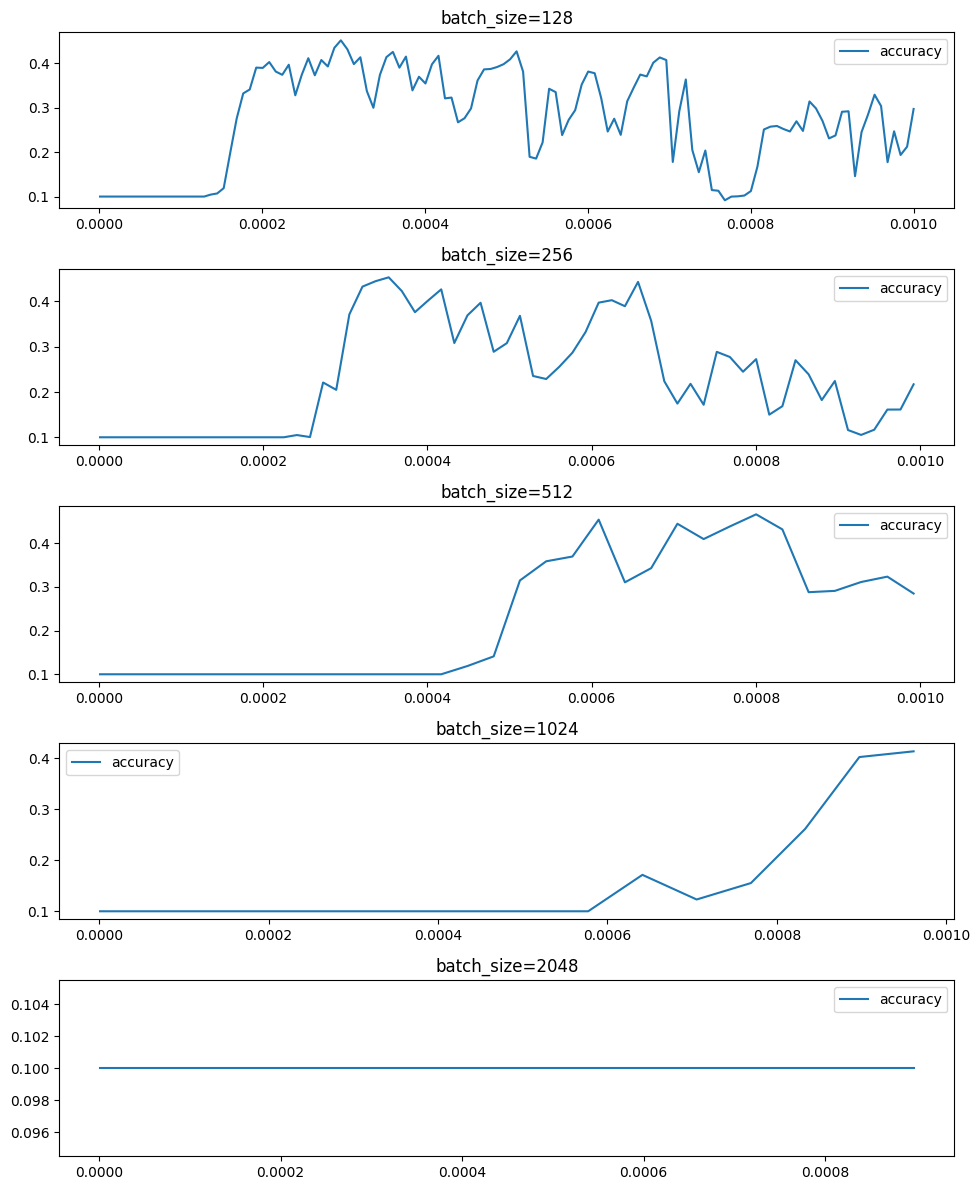

In [ ]:

#INFO : all of these have lr_max = 1e-3, lr_min = 1e-6
file_names = ['CIFAR10_rangeLR_pretrained_batchs_128.csv', 'CIFAR10_rangeLR_pretrained_batchs_256.csv', 'CIFAR10_rangeLR_pretrained_batchs_512.csv', 'CIFAR10_rangeLR_pretrained_batchs_1024.csv', 'CIFAR10_rangeLR_pretrained_batchs_2048.csv']

metrics_dfs = []

fig, axs = plt.subplots(5, figsize=(10, 12))
axs = axs.flatten()


for i, file_name in enumerate(file_names):

  df = pd.read_csv(os.path.join(metric_folder, file_names[i]))
  dataset_name = file_names[i].split('_')[0]

  batch_s = file_name.split('_')[-1].split('.')[0]

  ax = axs[i]
  #ax.plot(x, y, label=f'Subplot {i+1}')

  #todo plot accuracy learning rate

  df_filter = df[df['source'] == 'test']
  x = df_filter['lr'].to_numpy()
  y1 = df_filter['accuracy'].to_numpy()

  ax.plot(x, y1, label = "accuracy")

  ax.set_title(f'batch_size={batch_s}')
  ax.legend()

plt.tight_layout()
plt.show()

:## CIFAR 10 with bigger batches and  lr_max = 1e-2, lr_min = 1e-4

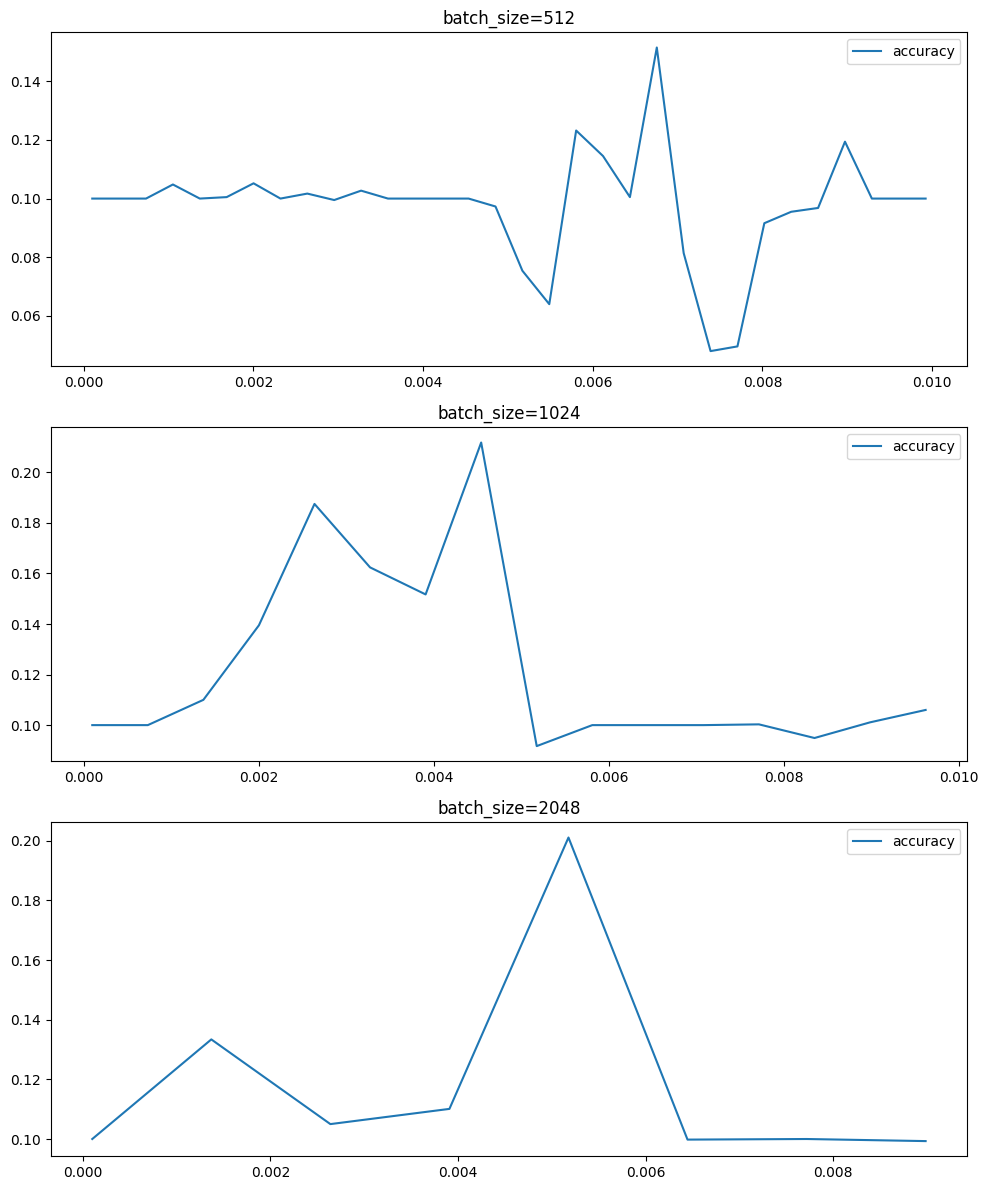

In [ ]:
file_names = ['CIFAR10_rangeLR_pretrained_batchs_512_lr_4_2.csv', 'CIFAR10_rangeLR_pretrained_batchs_1024_lr_4_2.csv', 'CIFAR10_rangeLR_pretrained_batchs_2048_lr_4_2.csv']

metrics_dfs = []

fig, axs = plt.subplots(3, figsize=(10, 12))
axs = axs.flatten()


for i, file_name in enumerate(file_names):

  df = pd.read_csv(os.path.join(metric_folder, file_names[i]))
  dataset_name = file_names[i].split('_')[0]

  batch_s = file_name.split('_')[-4]

  ax = axs[i]
  #ax.plot(x, y, label=f'Subplot {i+1}')

  #todo plot accuracy learning rate

  df_filter = df[df['source'] == 'test']
  x = df_filter['lr'].to_numpy()
  y1 = df_filter['accuracy'].to_numpy()

  ax.plot(x, y1, label = "accuracy")

  ax.set_title(f'batch_size={batch_s}')
  ax.legend()

plt.tight_layout()
plt.show()

## new section


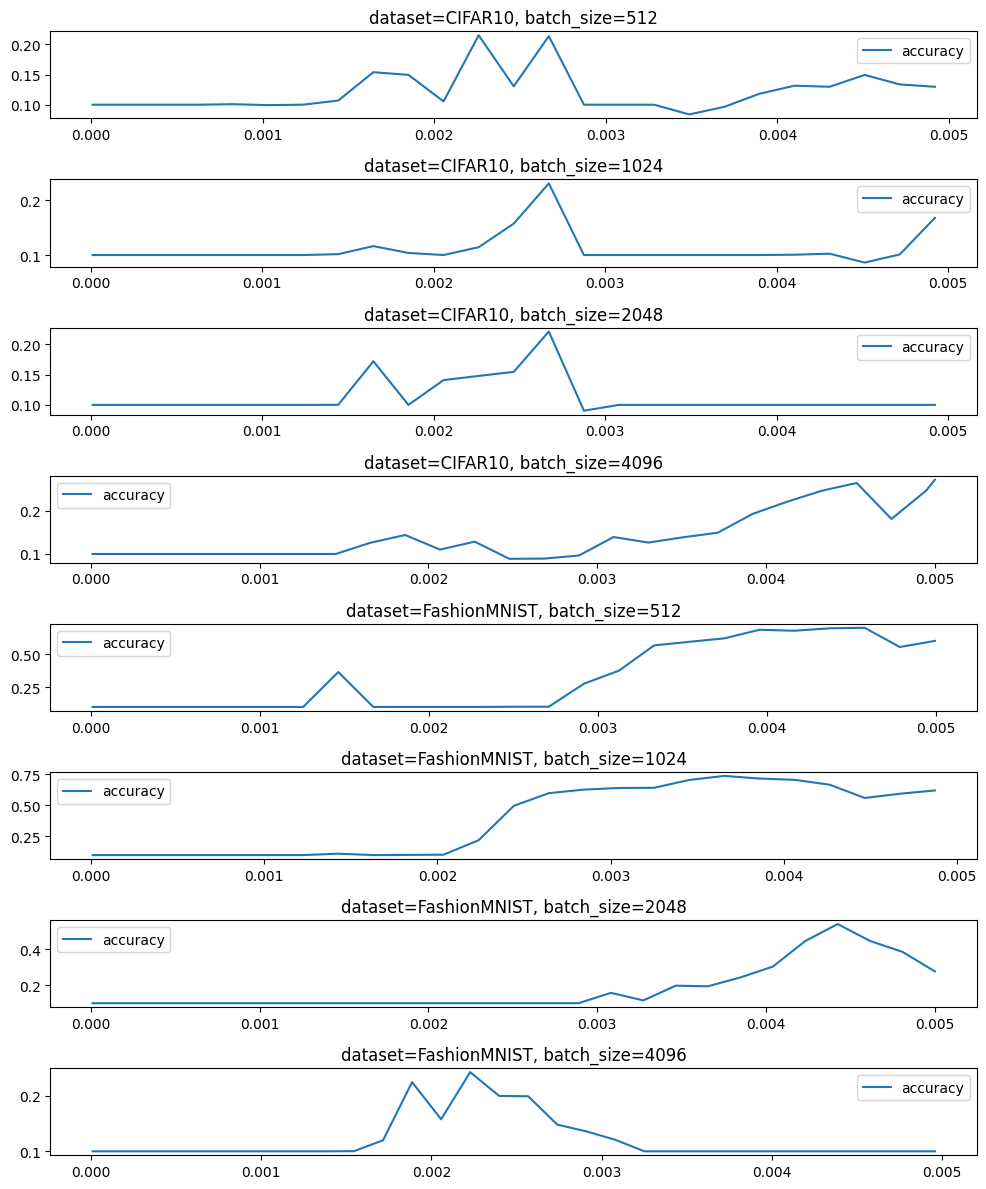

In [10]:
file_names = [x for x in os.listdir('./metrics') if 'pretrained_3P' in x]

#/content/drive/MyDrive/cours/MA/MA4 (3)/OptML/project/OML---mini-project-main/src/metrics/FashionMNIST_rangeLR_pretrained_3P_b2048_lrmax5em5.csv
#/content/drive/MyDrive/cours/MA/MA4 (3)/OptML/project/OML---mini-project-main/src/metrics/CIFAR10_rangeLR_pretrained_3P_b1024_lrmax5em5.csv

metrics_dfs = []

fig, axs = plt.subplots(8, figsize=(10, 12))
axs = axs.flatten()


for i, file_name in enumerate(file_names):



  df = pd.read_csv(os.path.join(metric_folder, file_names[i]))
  dataset_name = file_names[i].split('_')[0]

  batch_s = file_name.split('_')[4].split('b')[-1]

  ax = axs[i]
  #ax.plot(x, y, label=f'Subplot {i+1}')

  #todo plot accuracy learning rate

  df_filter = df[df['source'] == 'test']
  x = df_filter['lr'].to_numpy()
  y1 = df_filter['accuracy'].to_numpy()

  ax.plot(x, y1, label = "accuracy")

  ax.set_title(f'dataset={dataset_name}, batch_size={batch_s}')
  ax.legend()

plt.tight_layout()
plt.show()